In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

conn = sqlite3.connect("../pitchfork-data/pitchfork.db")
df = pd.read_sql_query("select * from reviews;", conn)
df_years = pd.read_sql_query("select * from years;", conn)
df_genres = pd.read_sql_query("select * from genres", conn)
df_reviews = pd.read_sql_query("select * from content", conn)

In [60]:
df.sort_values('pub_date', ascending=False, inplace=True)

In [61]:
df.drop_duplicates('pub_date', keep='last', inplace=True)

In [111]:
df['month-year'] = df['pub_date']

In [112]:
df.sample(20)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,content,subjectivity,polarity,month-year
5589,5929e66d13d197565213d8d0,private airplane,connections,https://pitchfork.com/reviews/albums/18038-con...,7.6,0,aaron leitko,None,2013-05-02,3,2,5,2013,"Within the first 30 seconds of “Finally"", the ...",0.455402,0.082012,2013-05-02
12776,5929daf313d197565213ce21,ghost,radical face,https://pitchfork.com/reviews/albums/10090-ghost/,5.0,0,mark richardson,None,2007-04-13,4,13,4,2007,Floridian Ben Cooper is the one-man-band recor...,0.415156,0.142467,2007-04-13
9047,5929dfe2d7a71d1ea569a1a5,distant relatives,"damian marley, nas",https://pitchfork.com/reviews/albums/14265-dis...,6.1,0,tom breihan,None,2010-05-21,4,21,5,2010,At the end of the 1998 Hype Williams film Bell...,0.601083,0.135918,2010-05-21
7282,5929db42d7a71d1ea5699cb3,streetz calling,future,https://pitchfork.com/reviews/albums/16054-str...,6.9,0,jordan sargent,None,2011-11-17,3,17,11,2011,"As the epicenter of popular rap music, Atlanta...",0.464933,0.155382,2011-11-17
17179,5929d85bd7a71d1ea56999a9,ego war,audio bullys,https://pitchfork.com/reviews/albums/354-ego-war/,7.4,0,nitsuh abebe,None,2003-06-17,1,17,6,2003,Part of me feels a little bit sorry for Audio ...,0.436749,0.160584,2003-06-17
17822,5929da10d7a71d1ea5699b61,tjo tko,tara jane oneil,https://pitchfork.com/reviews/albums/6002-tjo-...,6.2,0,brendan reid,None,2002-10-24,3,24,10,2002,Take a look at Pitchfork's last two Tara Jane ...,0.494541,0.076469,2002-10-24
10379,5929e356c0084474cd0c4e6e,score! twenty years of merge records: the covers,various artists,https://pitchfork.com/reviews/albums/12908-sco...,6.4,0,stephen m. deusner,None,2009-04-09,3,9,4,2009,Merge Records doesn't look its age. Originally...,0.496552,0.132077,2009-04-09
11641,5929d8070c2bba1b7de020ce,venus on earth,dengue fever,https://pitchfork.com/reviews/albums/11241-ven...,4.0,0,mike powell,None,2008-03-21,4,21,3,2008,The task of presenting Dengue Fever-- an L.A.-...,0.440312,0.153787,2008-03-21
17060,5929d808d7a71d1ea5699963,counterfeit 2,martin l. gore,https://pitchfork.com/reviews/albums/3625-coun...,6.9,0,michael idov,None,2003-07-24,3,24,7,2003,"Not unlike his Stateside namesake Al, Martin G...",0.505711,0.031800,2003-07-24
5883,5929e737c0084474cd0c50e1,honeys,pissed jeans,https://pitchfork.com/reviews/albums/17581-hon...,8.1,0,ian cohen,None,2013-02-11,0,11,2,2013,If you're into Pissed Jeans' music because you...,0.527076,0.107187,2013-02-11


In [62]:
df[df['artist'] == 'radiohead']

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
638,594a847405d15f7602c7498f,ok computer oknotok 1997 2017,radiohead,https://pitchfork.com/reviews/albums/radiohead...,10.0,1,jayson greene,None,2017-06-22,3,22,6,2017
7423,5929dba1c0084474cd0c4687,tkol rmx 1234567,radiohead,https://pitchfork.com/reviews/albums/15905-tko...,6.0,0,jess harvell,None,2011-10-10,0,10,10,2011
9914,5929e2200c2bba1b7de02b23,hail to the thief: special collectors edition,radiohead,https://pitchfork.com/reviews/albums/13384-hai...,8.6,1,joe tangari,None,2009-08-27,3,27,8,2009
9924,5929e227d7a71d1ea569a40d,kid a: special collectors edition,radiohead,https://pitchfork.com/reviews/albums/13385-kid...,10.0,1,rob mitchum,None,2009-08-25,1,25,8,2009
10354,5929e345eb335119a49ef0e3,pablo honey: collector's edition,radiohead,https://pitchfork.com/reviews/albums/12938-pab...,5.4,1,scott plagenhoef,None,2009-04-16,3,16,4,2009
18940,5929dcd15e6ef95969324b46,amnesiac,radiohead,https://pitchfork.com/reviews/albums/6659-amne...,9.0,0,ryan schreiber,None,2001-06-04,0,4,6,2001
19152,5929dd54eb335119a49eea98,kid a,radiohead,https://pitchfork.com/reviews/albums/6656-kid-a/,10.0,0,brent dicrescenzo,None,2000-10-02,0,2,10,2000


In [63]:
def plot_violins(df, genre):
    years = list(df.pub_year.unique())
    score_dist = {1999: [],}
    for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
        if year not in score_dist.keys():
            score_dist[year] = []
        else:
            score_dist[year] = score_dist[year] + [score]

    plt.figure(figsize=(30,14))
    plt.hlines(8.5, 1998, 2018)
    for each in years:
        plt.xticks(years, fontsize=16)
        plt.yticks(range(0,11))
        if each == 2018:
            continue
        plt.violinplot(np.array(score_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Score Distribution by Year ({})'.format(genre), fontsize=24)
    plt.ylabel('Score', fontsize=16)
    plt.xlabel('Year', fontsize=16)

    plt.savefig('images/{}.png'.format(genre[:3]))

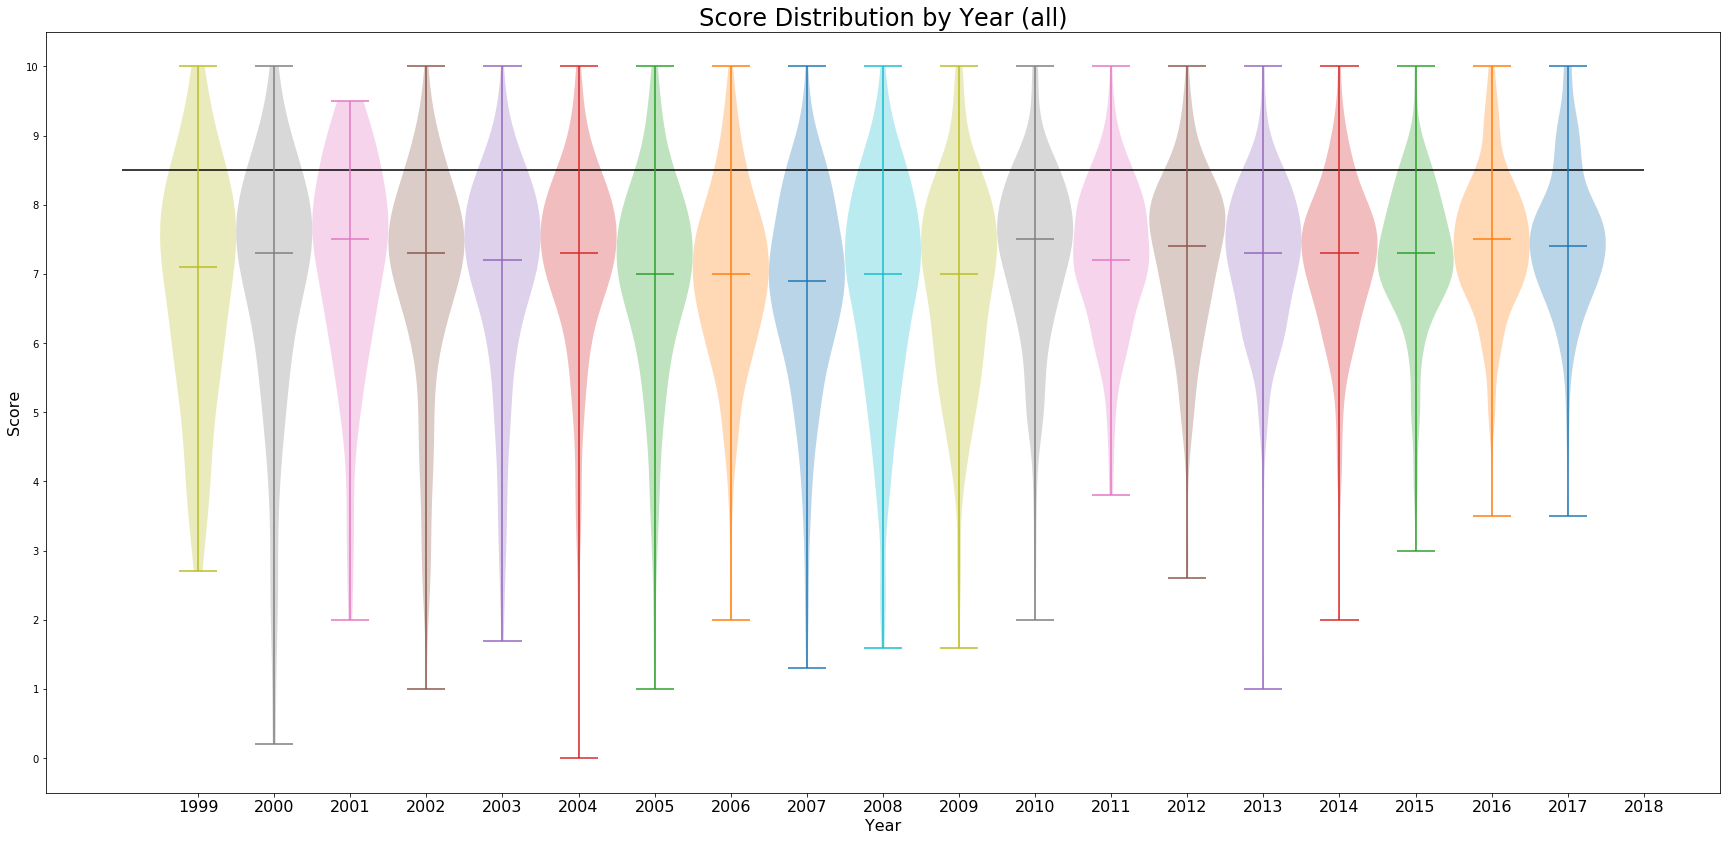

In [64]:
plot_violins(df, 'all')

In [78]:
df = df.merge(df_years).reset_index()
df = df.merge(df_genres).reset_index()
df.year.fillna(value=df.pub_year, inplace=True)
df.drop_duplicates('reviewid',inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df.year = df.year.astype(int)

In [79]:
df['num_years_since_release'] = df.pub_year - df.year
df = df[df.num_years_since_release <= 1]

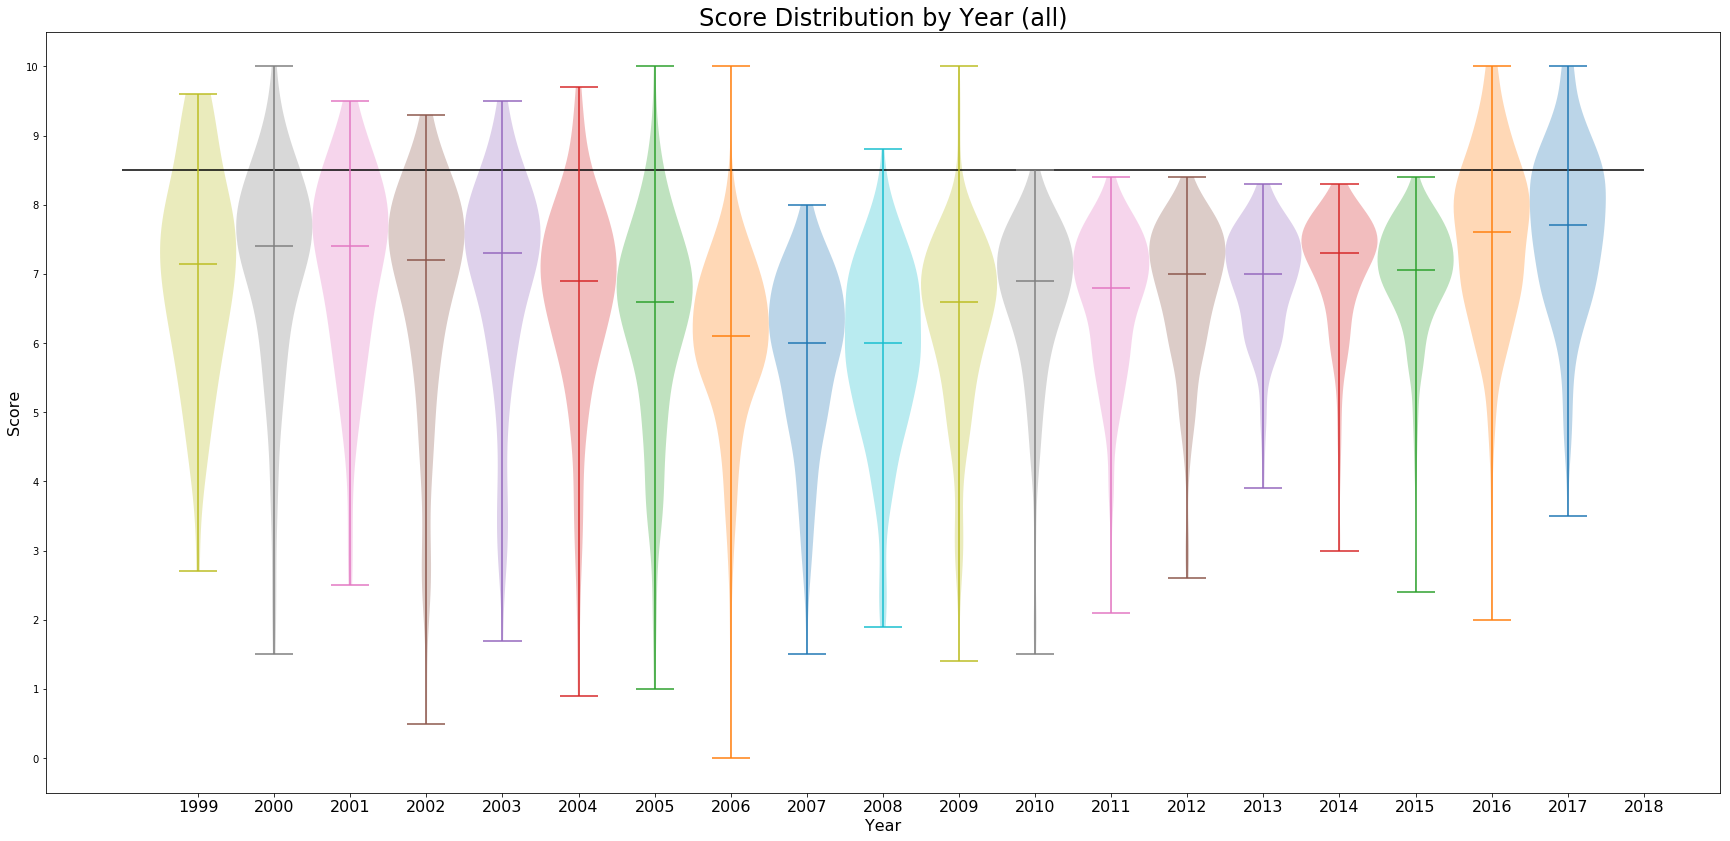

In [14]:
plot_violins(df, 'all')

In [88]:
df = df.merge(df_reviews)

In [89]:
sentiments = []
for each in range(len(df['reviewid'])):
    sentiments.append((df['reviewid'].iloc[each], 
                     TextBlob(df['content'][each]).sentiment[1],
                     TextBlob(df['content'][each]).sentiment[0])) 
#                      TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[0],
#                      TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[1],
#                      TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[2]))

In [90]:
df_sent = pd.DataFrame(sentiments, columns=['reviewid', 'subjectivity', 'polarity'])

In [91]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19644 entries, 0 to 19643
Data columns (total 3 columns):
reviewid        19644 non-null object
subjectivity    19644 non-null float64
polarity        19644 non-null float64
dtypes: float64(2), object(1)
memory usage: 460.5+ KB


In [92]:
df = df.merge(df_sent)

(array([  7.00000000e+00,   2.50000000e+01,   2.51000000e+02,
          1.35400000e+03,   4.58300000e+03,   7.19800000e+03,
          4.82500000e+03,   1.24600000e+03,   1.56000000e+02,
          1.10000000e+01]),
 array([-0.17375011, -0.12035963, -0.06696916, -0.01357869,  0.03981178,
         0.09320225,  0.14659272,  0.19998319,  0.25337366,  0.30676414,
         0.36015461]),
 <a list of 10 Patch objects>)

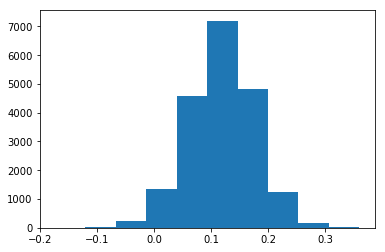

In [93]:
plt.hist(df['polarity'])

In [94]:
def plot_violins(df, genre):
    years = list(df.pub_year.unique())
    score_dist = {1999: [],}
    for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
        if year not in score_dist.keys():
            score_dist[year] = []
        else:
            score_dist[year] = score_dist[year] + [score]

    plt.figure(figsize=(30,14))
    plt.hlines(8.5, 1998, 2018)
    for each in years:
        plt.xticks(years, fontsize=16)
        plt.yticks(range(0,11))
        if each == 2018:
            continue
        plt.violinplot(np.array(score_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Score Distribution by Year ({})'.format(genre), fontsize=24)
    plt.ylabel('Score', fontsize=16)
    plt.xlabel('Year', fontsize=16)

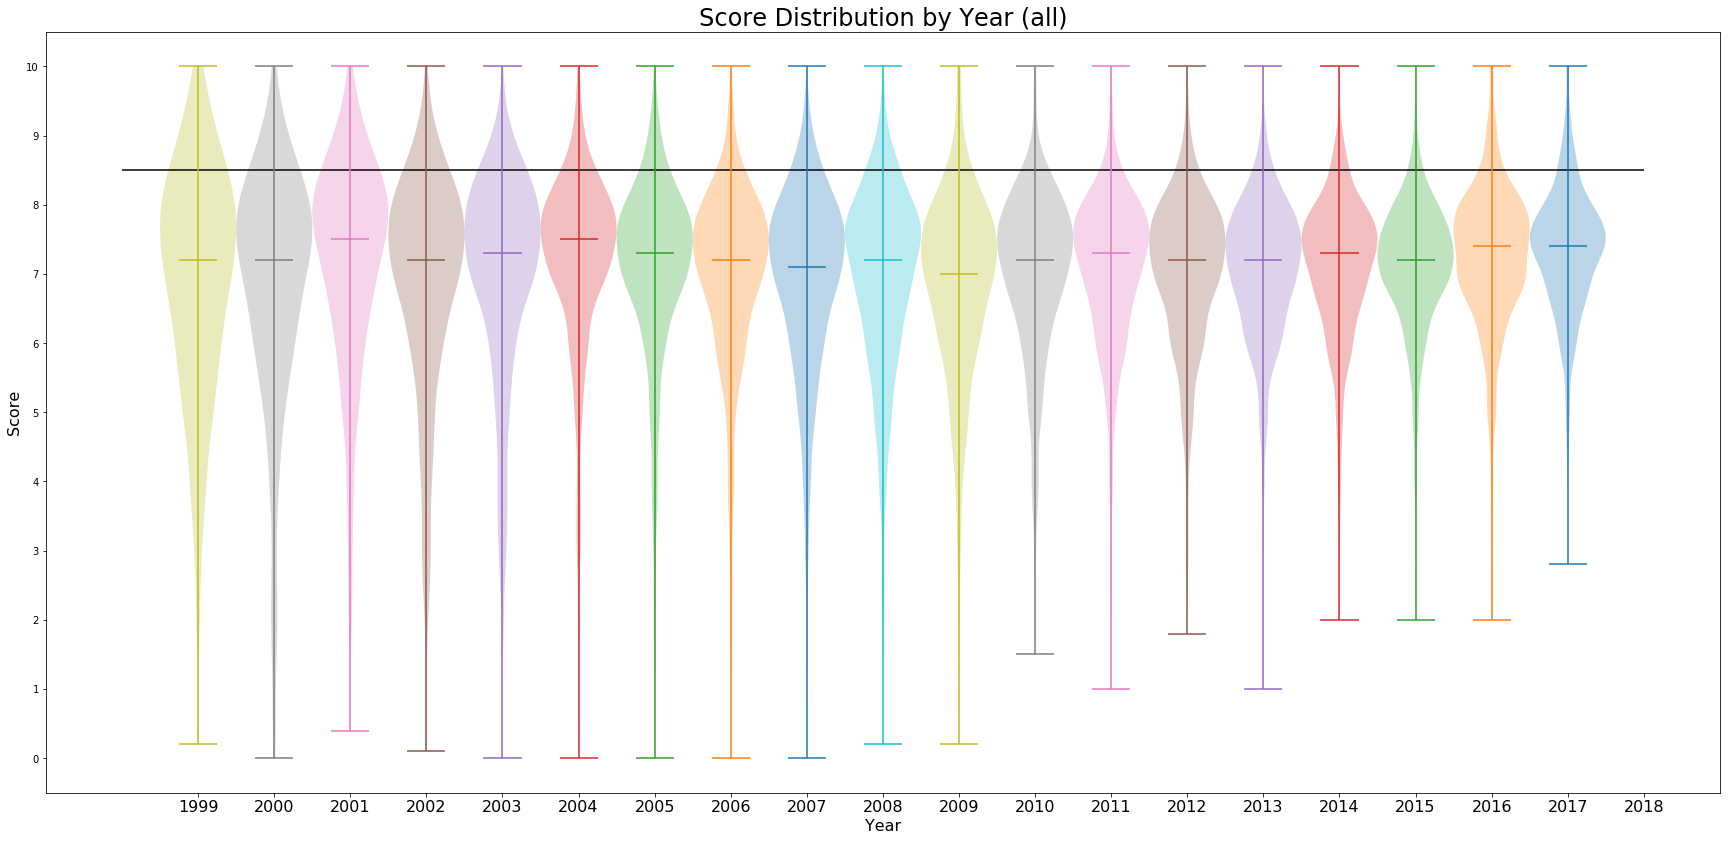

In [95]:
plot_violins(df, 'all')

In [96]:
df.groupby('pub_year')['subjectivity'].mean()

pub_year
1999    0.497911
2000    0.497301
2001    0.494249
2002    0.493339
2003    0.494439
2004    0.492764
2005    0.487673
2006    0.487367
2007    0.483159
2008    0.482458
2009    0.483989
2010    0.483238
2011    0.479310
2012    0.480533
2013    0.477305
2014    0.474604
2015    0.472466
2016    0.470902
2017    0.469855
2018    0.498516
Name: subjectivity, dtype: float64

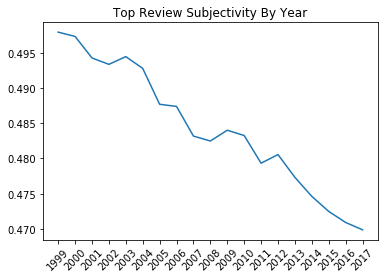

In [102]:
years = df.groupby('pub_year')['pub_year'].mean().values[0:19]
plt.plot(df.groupby('pub_year')['pub_year'].mean()[0:19], df.groupby('pub_year')['subjectivity'].mean()[0:19])
plt.xticks(years, rotation=45)
plt.title('Top Review Subjectivity By Year')
plt.show()

ValueError: invalid literal for float(): 2018-01-06

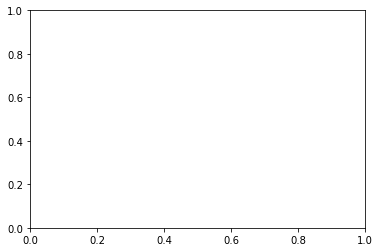

In [119]:
years = df.groupby('pub_date')['pub_date']
plt.plot(df.groupby('pub_date')['pub_date'], df.groupby('pub_date')['subjectivity'].mean())
# plt.xticks(years, rotation=45)
plt.title('Top Review Subjectivity By Year')
plt.show()

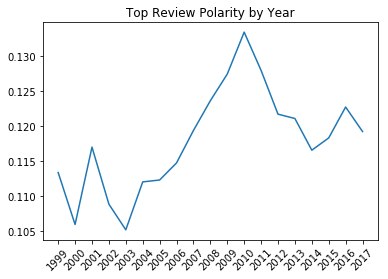

In [103]:
years = df.groupby('pub_year')['pub_year'].mean().values[0:19]
plt.plot(df.groupby('pub_year')['pub_year'].mean()[0:19], df.groupby('pub_year')['polarity'].mean()[0:19])
plt.xticks(years, rotation=45)
plt.title('Top Review Polarity by Year')
plt.show()

In [101]:
from scipy.stats import ttest_ind

sub2015 = df[df['pub_year'] == 2014]['subjectivity']
sub2016 = df[df['pub_year'] == 2017]['subjectivity']

t, p = ttest_ind(sub2015, sub2016, equal_var=False)

p

0.010225532464488308

In [82]:
pol2015 = df[df['pub_year'] == 2010]['polarity']
pol2016 = df[df['pub_year'] == 2016]['polarity']

t, p = ttest_ind(pol2015, pol2016, equal_var=False)

p

0.061138232055987819